1.Calculator grapth

In [ ]:
import numpy as np
np.random.seed(0)


In [ ]:
num1 = 3
num2 = 4
x = np.random.randn(num1,num2)
#The line x = np.random.randn(num1, num2) generates a NumPy array x with dimensions num1 rows and num2 columns.
y = np.random.randn(num1,num2)
z = np.random.randn(num1,num2)


In [ ]:
a = x * y
b = a + z
c= np.sum(b)

In [ ]:
print("matrix a: ",a)
print("matrix b: ",b)

matrix a:  [[ 1.34251038  0.04868913  0.43442581  0.74772853]
 [ 2.79027931  0.20049663  0.297442    0.12927355]
 [ 0.26351668  0.26837482  0.12451648 -1.07931093]]
matrix b:  [[ 3.61226501 -1.40567654  0.48018432  0.56054468]
 [ 4.32305853  1.6698554   0.45238942  0.50743607]
 [-0.62426907 -1.71242165 -0.22339567 -0.92296196]]


In [ ]:
grad_c = 1.0
grad_b = grad_c * np.ones((num1,num2))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x


In [ ]:
print("grad_x: ", grad_x)
print("grad_y: ", grad_y)
print("grad_z: ", grad_z)

grad_x:  [[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]
grad_y:  [[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]
grad_z:  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Using Pytorch

In [ ]:
import torch
num1,num2 = 3,4
x1 = torch.randn(num1,num2, requires_grad= True)
y1 = torch.randn(num1,num2)
z1 = torch.randn(num1,num2)

a = x1*y1
b = a+z1
c = torch.sum(b)
c.backward()
print(x1.grad)

tensor([[ 0.4545, -1.5289, -0.6456, -0.7580],
        [-1.2830, -0.1981, -1.3482, -0.0161],
        [-2.3275, -0.9067, -1.9930, -1.4570]])


sample use to training model

In [ ]:
### Defining a network Layer ###

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer
import tensorflow as tf

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    z = tf.matmul(x,self.W)
    y = tf.sigmoid(z + self.b)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.keras.utils.set_random_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())

[[0.27064407 0.18269512 0.50374055]]


Sample biuld a CNN architecture

In [ ]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :)
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(n_output_nodes, activation = 'sigmoid')

# Add the dense layer to the model
model.add(dense_layer)


In [ ]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input).numpy()
print(model_output)
predic = model.predict(x_input)
print(predic)

[[0.57467866 0.61822414 0.88219965]]
1/1 [==============================] - 0s 60ms/step
[[0.57467866 0.61822414 0.88219965]]


In addition to defining models using the Sequential API, we can also define neural networks by directly subclassing the Model class, which groups layers together to enable model training and inference. The Model class captures what we refer to as a "model" or as a "network". Using Subclassing, we can create a class for our model, and then define the forward pass through the network using the call function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions, and custom models. Let's define the same neural network as above now using Subclassing rather than the Sequential model.

In [ ]:


class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.'''
    self.dense_layer = Dense(n_output_nodes, activation = 'sigmoid')

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)

In [ ]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.59806025 0.3941432  0.29754224]], shape=(1, 3), dtype=float32)


Importantly, Subclassing affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the call function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument isidentity to control this behavior:

In [ ]:
### Defining a model using subclassing and specifying custom behavior ###


class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  '''TODO: Implement the behavior where the network outputs the input, unchanged,
      under control of the isidentity argument.'''
  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity :
        return inputs
    return x

In [ ]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity = True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.80413926 0.40394166 0.36478916]]; network identity output: [[1. 2.]]


Automatic differentiation is one of the most important parts of TensorFlow and is the backbone of training with backpropagation. We will use the TensorFlow GradientTape tf.GradientTape to trace operations for computing gradients later.

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular tf.GradientTape can only compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a persistent gradient tape.

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function
 and compute the gradient:

In [2]:
### Gradient computation with GradientTape ###
import tensorflow as tf
# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

Initializing x=[[0.11599526]]


Text(0, 0.5, 'x value')

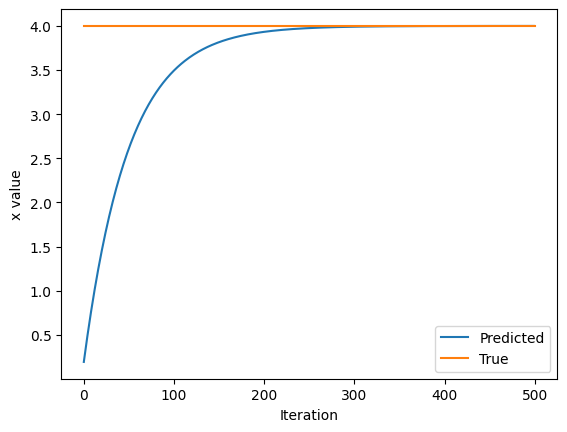

In [4]:
### Function minimization with automatic differentiation and SGD ###
import matplotlib.pyplot as plt

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x_f - x)*(x_f - x)

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')